## Generating Traffic Image Data

In [ ]:
pip install Pillow

In [1]:
## Importing libraries
import os
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime

## Housekeeping
image_dir = Path("Image_Data/")
image_dir.mkdir(parents = True, exist_ok = True)
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [5]:
## Initializing traffic_data data-frame
traffic_data = pd.DataFrame()

## Concatenating each data file to traffic_data
for year in os.listdir('Traffic_Data/'):
    for file_name in os.listdir(os.path.join('Traffic_Data', year)):
        file = pd.read_csv(os.path.join('Traffic_Data', year, file_name))
        traffic_data = pd.concat([traffic_data, file], axis = 0)
        
## Changing 'Hour' variable to datetime and sorting by date
traffic_data['Hour'] = pd.to_datetime(traffic_data['Hour'])
traffic_data = traffic_data.sort_values('Hour').reset_index(drop = True)

## Reading California I-5 sensor information
all_sensors = pd.read_csv('pems_sensors.csv'); all_sensors['ID'] = all_sensors['ID'].astype(str)

## Extracting columns from traffic_data data-frame
data_sensors = pd.DataFrame({'Sensor': traffic_data.drop(columns = ['Hour', '# Lane Points', '% Observed']).columns})
data_sensors['ID'] = data_sensors['Sensor'].str.split('-', n = 1, expand = True)[0].astype(str)

## Inner joining data-frames and sorting by ordering (S --> N, San Diego --> Oregon)
new_sensors = data_sensors.merge(all_sensors, how = 'inner', on = 'ID').sort_values('Ordering').reset_index(drop = True)

## Extracting proper column ordering and adding 'Hour' to the beginning
all_columns = new_sensors['Sensor'].tolist()
all_columns.insert(0, 'Hour')

## Changing column ordering of traffic_data
traffic_data = traffic_data[all_columns]

## Dropping all columns in traffic_data with missing values
traffic_data = traffic_data.dropna(axis = 'columns')

## Cutting some rows to make n_cols % 10 = 0
traffic_data = traffic_data.drop(columns = ['315969-ML', '315927-ML', '317843-ML'])

## Cutting some rows to make n_rows % 200 = 0
traffic_data = traffic_data.iloc[0:52000,]

## Saving data-frame as csv
traffic_data.to_csv('Output_Data/full_traffic_data.csv', index = False)

In [6]:
## Removing 'Hour' variable before scaling
traffic_data = traffic_data.drop(columns = ['Hour'])

## Scaling traffic values of data-frame to be between 0-254
flat_data = traffic_data.to_numpy().flatten()
flat_data = 254 * (flat_data - np.min(flat_data)) / (np.max(flat_data) - np.min(flat_data))
scaled_data = pd.DataFrame(flat_data.reshape((traffic_data.shape[0], traffic_data.shape[1])), columns = traffic_data.columns)

## Initializing list to store images
images = list()
labels = list()

## Initializing data windows
n_time_windows = 260
n_sensor_windows = 27

In [7]:
for i in range(0, n_time_windows):
    for j in range(0, n_sensor_windows):
        
        ## Setting time window
        time_loc = [(i * 200), (i * 200 + 200)]
        
        ## Setting sensor window
        sensor_loc = [(j * 10), (j * 10 + 200)]
        
        ## Creating img with window subset
        img = np.array(scaled_data.iloc[time_loc[0]:time_loc[1], sensor_loc[0]:sensor_loc[1]])
        
        ## Appending to lists
        images.append(img)
        labels.append(0)
        
print("Loaded traffic data:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded traffic data:
 - np.shape(images)     (50, 200, 200)
 - np.shape(labels)     (50,)


In [8]:
## Storing all images to disk
def store_many_disk(images):

    ## Saving images one by one
    for i, image in enumerate(images):
        storing = Image.fromarray(image)
        storing = storing.convert('L')
        storing.save(image_dir / f"{i}.png")
            
## Experimenting
store_many_disk(images)

In [11]:
## Reading all images from disk
def read_many_disk(n_images):
    images = []
    for image_id in range(n_images):
        images.append(np.array(Image.open(image_dir / f"{image_id}.png")))
    return images

n_images = 50
imgs = read_many_disk(n_images)

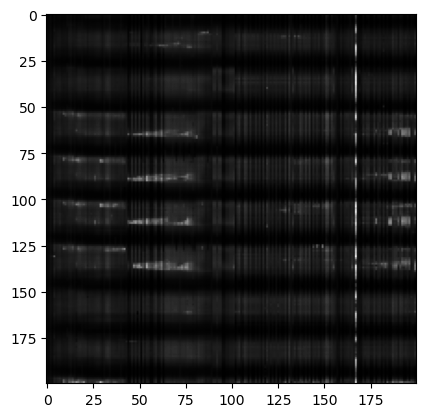

In [10]:
plt.imshow(images[0], cmap = 'gray')

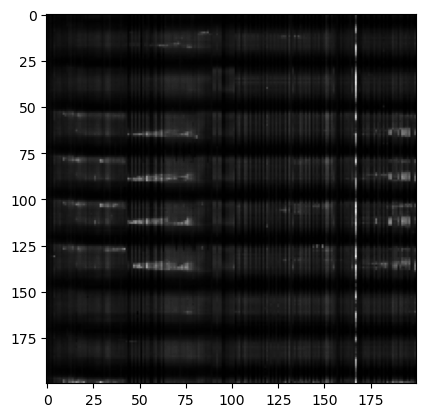

In [12]:
plt.imshow(imgs[0], cmap = 'gray')

In [ ]:
## Reading the data
jan = pd.read_csv('jan2023_output.csv')
feb = pd.read_csv('feb2023_output.csv')
mar = pd.read_csv('mar2023_output.csv')

## Concatenating all data
data = pd.concat([jan, feb, mar], axis = 0).drop(columns = ['Hour', '# Lane Points', '% Observed'])
data.reset_index(drop = True, inplace = True)

## Cutting some rows to make n_rows % 248 = 0
data = data.iloc[0:1736,]

## Scaling traffic values of data-frame to be between 0-255
flat_data = data.to_numpy().flatten()
flat_data = 255 * (flat_data - np.min(flat_data)) / (np.max(flat_data) - np.min(flat_data))
scaled_data = pd.DataFrame(flat_data.reshape((data.shape[0], data.shape[1])), columns = data.columns)

## Setting number of images to create
n_images = int(scaled_data.shape[0] / 248)

## Initializing list to store images
images = list()
labels = list()

## Creating n_images using the data
for i in range(n_images):
    img = np.array(scaled_data.iloc[(i * 248):(i*248)+248,])
    images.append(img)
    labels.append(0)
    
print("Loaded traffic data:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

In [ ]:
scaled_data.head()

In [ ]:
## Storing all images to disk
def store_many_disk(images, labels):

    ## Saving images one by one
    for i, image in enumerate(images):
        storing = Image.fromarray(image)
        storing = storing.convert('L')
        storing.save(disk_dir / f"{i}.png")
            
## Experimenting
store_many_disk(images, labels)

In [ ]:
## Reading all images from disk
def read_many_disk(n_images):
    images = []
    for image_id in range(n_images):
        images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))
    return images

n_images = 7
imgs = read_many_disk(n_images)

In [ ]:
plt.imshow(imgs[0], cmap = 'gray')

### Experimenting with missing values:

In [ ]:
## Reading the data
jan = pd.read_csv('jan2023_output.csv')
feb = pd.read_csv('feb2023_output.csv')
mar = pd.read_csv('mar2023_output.csv')

## Concatenating all data
data = pd.concat([jan, feb, mar], axis = 0).drop(columns = ['Hour', '# Lane Points', '% Observed'])
data.reset_index(drop = True, inplace = True)

## Cutting some rows to make n_rows % 248 = 0
data = data.iloc[0:1736,]

## Scaling traffic values of data-frame to be between 0-255
flat_data = data.to_numpy().flatten()
flat_data = 255 * (flat_data - np.min(flat_data)) / (np.max(flat_data) - np.min(flat_data))
scaled_data = pd.DataFrame(flat_data.reshape((data.shape[0], data.shape[1])), columns = data.columns)

scaled_data.iloc[0:100, 0:30] = np.nan

## Setting number of images to create
n_images = int(scaled_data.shape[0] / 248)

## Initializing list to store images
images = list()
labels = list()

## Creating n_images using the data
for i in range(n_images):
    img = np.array(scaled_data.iloc[(i * 248):(i*248)+248,])
    images.append(img)
    labels.append(0)
    
print("Loaded traffic data:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

In [ ]:
scaled_data.head()

In [ ]:
## Storing all images to disk
def store_many_disk(images, labels):

    ## Saving images one by one
    for i, image in enumerate(images):
        storing = Image.fromarray(image)
        storing = storing.convert('L')
        storing.save(disk_dir / f"{i}.png")
            
## Experimenting
store_many_disk(images, labels)

In [ ]:
## Reading all images from disk
def read_many_disk(n_images):
    images = []
    for image_id in range(n_images):
        images.append(np.array(Image.open(disk_dir / f"{image_id}.png")))
    return images

n_images = 7
imgs = read_many_disk(n_images)

In [ ]:
plt.imshow(imgs[0], cmap = 'gray')

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.data.Dataset??